In [1]:
import nltk
import pandas as pd
import heapq
import pprint

from nltk.tokenize import wordpunct_tokenize, blankline_tokenize, line_tokenize, word_tokenize
from itertools import combinations
from nltk.corpus import stopwords
from time import time 
from gensim.models import Word2Vec, KeyedVectors
import multiprocessing

# # tensorflow
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Pytorch
import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence

# stanza
import stanza as st

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('sentences_15klyrics.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534943 entries, 0 to 534942
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   artist     534943 non-null  object
 1   song_name  534943 non-null  object
 2   song_id    534943 non-null  int64 
 3   sent       534943 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.3+ MB


In [3]:
pos_tagger =  st.Pipeline(lang='en')

2021-02-26 11:12:52 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-02-26 11:12:52 INFO: Use device: gpu
2021-02-26 11:12:52 INFO: Loading: tokenize
2021-02-26 11:12:56 INFO: Loading: pos
2021-02-26 11:12:56 INFO: Loading: lemma
2021-02-26 11:12:57 INFO: Loading: depparse
2021-02-26 11:12:57 INFO: Loading: sentiment
2021-02-26 11:12:57 INFO: Loading: ner
2021-02-26 11:12:58 INFO: Done loading processors!


In [4]:
sent = data.sent

In [5]:
sent[0]

"it's a junkie dream makes you so uptight"

In [9]:
for word in word_tokenize(sent[0]):
    print(word, pretrainedwvmodel.wv.similar_by_word(word, topn=4))
    print('==========')


it [('itself', 0.782857358455658), ('something', 0.7486327886581421), ('everything', 0.7118643522262573), ('them', 0.7043470144271851)]
's [("'s--the", 0.6630688309669495), ('was--the', 0.6064021587371826), ('is--the', 0.6045242547988892), ('its', 0.5987124443054199)]
a [('A', 0.816367506980896), ('-', 0.739240288734436), ('"', 0.7376177906990051), ('/', 0.7108931541442871)]
junkie [('junkies', 0.7693454027175903), ('addict', 0.7505453824996948), ('ex-junkie', 0.7027280926704407), ('junky', 0.6767479777336121)]
dream [('dreams', 0.8512080907821655), ('dreaming', 0.7916011214256287), ('dream-', 0.7445577383041382), ('day-dream', 0.7272703647613525)]
makes [('make', 0.8064786195755005), ('making', 0.7594941854476929), ('made', 0.6906698942184448), ('finds', 0.6746305227279663)]
you [('you--you', 0.7711327075958252), ('you-and', 0.7605157494544983), ('you--if', 0.7444275617599487), ('thatyou', 0.7353635430335999)]
so [('too', 0.7427366971969604), ('but', 0.7313002347946167), ('however', 0

In [10]:
doc = pos_tagger(sent[0])

In [11]:
dir(doc)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ents',
 '_num_tokens',
 '_num_words',
 '_process_sentences',
 '_sentences',
 '_text',
 'add_property',
 'build_ents',
 'entities',
 'ents',
 'from_serialized',
 'get',
 'get_mwt_expansions',
 'iter_tokens',
 'iter_words',
 'num_tokens',
 'num_words',
 'sentences',
 'set',
 'set_mwt_expansions',
 'text',
 'to_dict',
 'to_serialized']

In [23]:
doc.sentences[0].words[0]

{
  "id": 1,
  "text": "it",
  "lemma": "it",
  "upos": "PRON",
  "xpos": "PRP",
  "feats": "Case=Nom|Gender=Neut|Number=Sing|Person=3|PronType=Prs",
  "head": 5,
  "deprel": "nsubj",
  "misc": "start_char=0|end_char=2"
}

In [32]:
xl = [pretrainedwvmodel.wv.vocab[k.text].index for k in doc.sentences[0].words]
yl = [k.xpos for k in doc.sentences[0].words]

In [75]:
doc2 = pos_tagger('asdasd asdasd arkw mikwe')

In [102]:
tag2class = {
    '<PAD>':0,
    '<UNK>':404,
    'CC':1,
'CD':2,
'DT':3,
'EX':4,
'FW':5,
'IN':6,
'JJ':7,
'JJR':8,
'JJS':9,
'LS':10,
'MD':11,
'NN':12,
'NNS':13,
'NNP':14,
'NNPS':15,
'PDT':16,
'POS':17,
'PRP':18,
'PRP$':19,
'RB':20,
'RBR':21,
'RBS':22,
'RP':23,
'SYM':24,
'TO':25,
'UH':26,
'VB':27,
'VBD':28,
'VBG':29,
'VBN':30,
'VBP':31,
'VBZ':32,
'WDT':33,
'WP':34,
'WP$':35,
'WRB':36,}

In [103]:
xl = []
yl = []
len_seq = 20
seq = np.zeros(len_seq, dtype=np.int64)
# yseq = np.array(['<pad>' for _ in range(len_seq)])
yseq = np.zeros(len_seq, dtype=object)
for k in doc2.sentences[0].words:
    print(k.text, pretrainedwvmodel.wv.vocab.get(k.text), (pretrainedwvmodel.wv.vocab.get(k.text) is None))
    if (pretrainedwvmodel.wv.vocab.get(k.text) is None):
        xl.append(10001)
        yl.append(tag2class.get('<UNK>'))
        continue
    xl.append(pretrainedwvmodel.wv.vocab.get(k.text).index)
    yl.append(tag2class.get(k.xpos))
seq[:len(xl)] = xl
yseq[:len(yl)] = yl
    


asdasd None True
asdasd None True
arkw None True
mikwe None True


In [104]:
yl

[404, 404, 404, 404]

In [105]:
yseq

array([404, 404, 404, 404, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=object)

In [76]:
xl = []
len_seq = 20
seq = np.zeros(len_seq, dtype=np.int64)
for k in doc2.sentences[0].words:
    print(k.text, pretrainedwvmodel.wv.vocab.get(k.text), (pretrainedwvmodel.wv.vocab.get(k.text) is None))
    if k == '<pad>':
        xl.append(10000)
        continue
    if (pretrainedwvmodel.wv.vocab.get(k.text) is None):
        xl.append(10001)
        continue
    xl.append(pretrainedwvmodel.wv.vocab.get(k.text).index)
seq[:len(xl)] = xl

asdasd None True
asdasd None True
arkw None True
mikwe None True


In [77]:
seq

array([10001, 10001, 10001, 10001,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int64)

In [72]:
seq

array([   19,    24,     7, 45314,  3758,   618,    30,    57, 54995,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0], dtype=int64)

In [51]:
xl = [pretrainedwvmodel.wv.vocab.get(k).index  for k in ['asdklasd', 'asdasd'] ]
yl = [k.xpos for k in doc.sentences[0].words]

AttributeError: 'NoneType' object has no attribute 'index'

In [40]:
for k in ['asdklasd', 'asdasd']:
    pretrainedwvmodel.wv.vocab[k]
    if pretrainedwvmodel.wv.vocab[k].index:
        print(k)

KeyError: 'asdklasd'

In [46]:
pretrainedwvmodel.wv.vocab['he'].index

53

In [49]:
pretrainedwvmodel.wv.vocab.get('asdawdaw')

In [43]:
dir(pretrainedwvmodel.wv.vocab)

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [ ]:
xl

In [34]:
yl

['PRP', 'VBZ', 'DT', 'NN', 'NN', 'VBZ', 'PRP', 'RB', 'JJ']

In [4]:
# lyrics_pos_tagger = {
#     'artist':[],
#     'song_name':[],
#     'song_id':[],
#     'word':[],
#     'XPOS':[],
#     'UPOS':[],
# }

# max_length_sent = 0
# for song_id, song_info in data.iterrows():
#     lines = '. '.join(line_tokenize(song_info.lyric))
#     doc = pos_tagger(lines)
#     for sent in doc.sentences:
#         curr_max_length = 0
#         for word in sent.words:
#             curr_max_length += 1
#             lyrics_pos_tagger['artist'].append(song_info.artist)
#             lyrics_pos_tagger['song_name'].append(song_info.song_name)
#             lyrics_pos_tagger['song_id'].append(song_id)
#             lyrics_pos_tagger['word'].append(word.text)
#             lyrics_pos_tagger['XPOS'].append(word.xpos)
#             lyrics_pos_tagger['UPOS'].append(word.upos)
#         max_length_sent = max(max_length_sent, curr_max_length)


In [ ]:
# class DatasetMaper(Dataset):
# 	'''
# 	Handles batches of dataset
# 	'''
  
# 	def __init__(self, x, y):
# 		self.x = x
# 		self.y = y
		
# 	def __len__(self):
# 		return len(self.x)
		
# 	def __getitem__(self, idx):
# 		return self.x[idx], self.y[idx]

# training_set = DatasetMaper(X_train, y_train)
# validation_set = DatasetMaper(X_val, y_val)
# test_set = DatasetMaper(X_test, y_test)
		
# loader_training = DataLoader(training_set, batch_size=lstm_args.batch_size)
# loader_val = DataLoader(training_set, batch_size=lstm_args.batch_size)
# loader_test = DataLoader(test_set)

In [ ]:
# def sentence_encoder(text, vocab2index):
#     tokens = text.lower().split()
#     temp = np.full(len(vocab2index), len(vocab2index)+1)
#     sentencoded = np.array([vocab2index.get(word, len(vocab2index)+1) for word in tokens])
#     length = len(sentencoded)
#     temp[:length] = sentencoded
#     return temp

In [7]:
# Pretrained word2vec
import gensim.downloader as api
corpus = api.load('fasttext-wiki-news-subwords-300', return_path=True)
pretrainedwvmodel = KeyedVectors.load_word2vec_format(corpus)

In [ ]:
pretrainedwvmodel.wv.similar_by_word("its", topn=20)

In [ ]:
pretrainedwvmodel

In [ ]:
pretrained_embedding_matrix = pretrainedwvmodel.wv.vectors
pretrained_embedding_matrix.append(np.zeros((300,))) # Padding
padding_index = len(pretrained_embedding_matrix)

In [112]:
TAG2CLASS = {
    '<PAD>':0,
    '<UNK>':404,
    'CC':1,
'CD':2,
'DT':3,
'EX':4,
'FW':5,
'IN':6,
'JJ':7,
'JJR':8,
'JJS':9,
'LS':10,
'MD':11,
'NN':12,
'NNS':13,
'NNP':14,
'NNPS':15,
'PDT':16,
'POS':17,
'PRP':18,
'PRP$':19,
'RB':20,
'RBR':21,
'RBS':22,
'RP':23,
'SYM':24,
'TO':25,
'UH':26,
'VB':27,
'VBD':28,
'VBG':29,
'VBN':30,
'VBP':31,
'VBZ':32,
'WDT':33,
'WP':34,
'WP$':35,
'WRB':36,}

class DataMapper(Dataset):
    def __init__(self, sentence_lyrics_file, wvmodel, sequence_len):
        self.pos_tagger = st.Pipeline(lang='en')
        temp = pd.read_csv(sentence_lyrics_file)
        self.sents = temp.sent
        self.sequence_len=sequence_len
        self.model = wvmodel
    def __len__(self):
        return len(self.sents)
    
    def __getitem__(self, idx):
        doc = pos_tagger(self.sents[idx])
        xl = []
        yl = []
        seq = np.zeros(self.sequence_len, dtype=np.int64)
        yseq = np.zeros(self.sequence_len, dtype=object)
        for k in doc.sentences[0].words:
            if (self.model.wv.vocab.get(k.text) is None):
                xl.append(10001)
                yl.append(TAG2CLASS.get('<UNK>'))
                continue
            xl.append(self.model.wv.vocab.get(k.text).index)
            yl.append(TAG2CLASS.get(k.xpos))
        seq[:len(xl)] = xl
        yseq[:len(yl)] = yl
        return seq, yseq
        



In [113]:
nice = DataMapper('sentences_15klyrics.csv', pretrainedwvmodel, 20)

xn, yn = nice[0]
print(xn)
print(yn)

2021-02-26 12:09:40 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| pos       | combined  |
| lemma     | combined  |
| depparse  | combined  |
| sentiment | sstplus   |
| ner       | ontonotes |

2021-02-26 12:09:40 INFO: Use device: gpu
2021-02-26 12:09:40 INFO: Loading: tokenize
2021-02-26 12:09:40 INFO: Loading: pos
2021-02-26 12:09:40 INFO: Loading: lemma
2021-02-26 12:09:40 INFO: Loading: depparse
2021-02-26 12:09:40 INFO: Loading: sentiment
2021-02-26 12:09:41 INFO: Loading: ner
2021-02-26 12:09:41 INFO: Done loading processors!
[   19    24     7 45314  3758   618    30    57 54995     0     0     0
     0     0     0     0     0     0     0     0]
[18 32 3 12 12 32 18 20 7 0 0 0 0 0 0 0 0 0 0 0]


In [234]:
# data = pd.read_csv('sentences_15klyrics.csv')
from tqdm import tqdm
max_length_sent = 20
data = pd.read_csv('sentences_15klyrics.csv')
datak = {'sent':[], 'length':[]}
for song_id, song_info in tqdm(data.iterrows()):
    if not(type(song_info.sent)==str):
        continue
    curr_max_length = len(word_tokenize(song_info.sent))
    datak['sent'].append(song_info.sent)
    datak['length'].append(curr_max_length)
    max_length_sent = max(max_length_sent, curr_max_length)

684537it [02:17, 4977.66it/s]


In [233]:
song_info.sent

nan

In [235]:
dfdatak = pd.DataFrame(datak)

In [236]:
dfdatak.describe()

,length
count,684533.000000
mean,5.589098
std,3.488740
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,811.000000


In [237]:
dfdatak.query('length>10')

,sent,length
8,and when you grow up you're going to be a freak,12
17,you better call your mom she's out looking for...,11
60,The way you treated me will make me lose my mind,11
133,but you know me I come back when you want me to,12
138,I was looking for a job and then I found a job,12
...,...,...
684491,I ain't gonna bump no more with no big fat woman,13
684492,I ain't gonna bump no more with no big fat woman,13
684493,I ain't gonna bump no more with no big fat woman,13
684517,But it's goin' to take some time this time,11


In [238]:
help(dfdatak.groupby('length').describe)

Help on method describe in module pandas.core.groupby.groupby:

describe(**kwargs) method of pandas.core.groupby.generic.DataFrameGroupBy instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data types to include in the result. Ignored
        for ``Serie

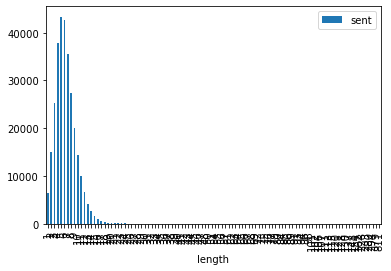

In [239]:
dfdatak.groupby('length').nunique().plot(kind='bar')
plt.show()

In [240]:
dfdatak.groupby('length').nunique().query('sent>3')

,sent
length,
1,6460
2,15053
3,25189
4,37940
5,43382
6,42682
7,35533
8,27434
9,20033


In [241]:
dfdatak.query('length>20').sent

835       I got rhythm....I got music....I got my gal Wh...
3085      doggone well I LUV ya and if ya break my heart...
3086      sure that it's true when you come runnin' up h...
9027      much? What is it that makes my head go 'round ...
9816       &amp;quot;You might get hurt if you don't kee...
                                ...                        
679286    Oh moon of Alabama it's time to say &amp;quot;...
680653    She came up to me and said: &quot;Do you wanna...
681688    then all of a sudden everything seemed to expl...
681691     don't you know sugar that every moment that I...
681696     WHEN YOU LEFT YOU TOOK ALL OF ME WITH YOU NOW...
Name: sent, Length: 739, dtype: object

In [242]:
dfdatak.query('length>50').sent[676]

KeyError: 676

In [243]:
teku = dfdatak.query('length>500').sent[446172]
teku.split(', ')

KeyError: 446172

In [158]:
dfdatak.length.describe()

count    534943.000000
mean          7.480139
std           4.730531
min           1.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         811.000000
Name: length, dtype: float64

In [150]:
max_length_sent

811

In [123]:
max_length_sent

643

In [143]:
help(tqdm)

Help on class tqdm in module tqdm.std:

class tqdm(tqdm.utils.Comparable)
 |  tqdm(*_, **__)
 |  
 |  Decorate an iterable object, returning an iterator which acts exactly
 |  like the original iterable, but prints a dynamically updating
 |  progressbar every time a value is requested.
 |  
 |  Method resolution order:
 |      tqdm
 |      tqdm.utils.Comparable
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __bool__(self)
 |  
 |  __del__(self)
 |  
 |  __enter__(self)
 |  
 |  __exit__(self, exc_type, exc_value, traceback)
 |  
 |  __hash__(self)
 |      Return hash(self).
 |  
 |  __init__(self, iterable=None, desc=None, total=None, leave=True, file=None, ncols=None, mininterval=0.1, maxinterval=10.0, miniters=None, ascii=None, disable=False, unit='it', unit_scale=False, dynamic_ncols=False, smoothing=0.3, bar_format=None, initial=0, position=None, postfix=None, unit_divisor=1000, write_bytes=None, lock_args=None, nrows=None, colour=None, gui=False, **kwargs)
 |     

In [122]:
song_info

artist                                             Trick Daddy
song_name                                           Nann Nigga
song_id                                                  12385
sent         (feat. Trina) [Trina] Hell no I don't wanna ho...
Name: 446172, dtype: object

In [214]:
line_tokenize(song_info.sent)

['Repeat (*)']

In [215]:
templ = np.array(word_tokenize(teku), dtype=object)
kasd = np.array_split(templ, 20)

In [221]:
for i  in kasd:
    print(' '.join(i))
    break

( feat . Trina ) [ Trina ] Hell no I do n't wan na holla at no motherfuckin Trick He all over there smelling like boonk and Hennesey and shit Hell no [ Taterhead ] I 'm saying though What


In [139]:
x = np.arange(9.0)
np.split(x, 3)

[array([0., 1., 2.]), array([3., 4., 5.]), array([6., 7., 8.])]

In [120]:
temp_tk = 'Repeat (*)'
word_tokenize(temp_tk)

['Repeat', '(', '*', ')']